# Spambase Logistic Regression Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import random
import warnings#This was necessary, you'll know soon enough

In [2]:
#Reading data
f = pd.read_csv('spambase.data', header = None)
f.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
random.seed(0)
training_data, test_data = train_test_split(f, train_size = 2/3)#Shuffles data and splits it, ~2/3rd for training
test_data.head()#Testing

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
2728,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
876,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,1
3542,0.67,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.33,0.33,...,0.056,0.280,0.168,0.056,0.000,0.000,1.866,17,112,0
898,0.00,0.0,0.55,0.0,0.0,0.55,0.0,0.27,0.00,0.00,...,0.000,0.194,0.000,0.582,0.291,0.582,2.309,35,291,1
3373,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,7,0


In [4]:
y_train = training_data.iloc[:, -1].to_numpy().reshape(-1, 1)
#del training_data.iloc[:, -1]
y_test = test_data.iloc[:, -1].to_numpy().reshape(-1, 1)
#del test_data[:, -1]

In [5]:
type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [6]:
#Bias terms
bias_training = np.ones(training_data.shape[0]).reshape(-1, 1)
bias_test = np.ones(test_data.shape[0]).reshape(-1, 1)
type(bias_training)

numpy.ndarray

In [7]:
def Zscore(x, dataset):
    for i in range(dataset.shape[1] - 1):
        col = dataset.iloc[:, i].to_numpy()
        temp = (col - np.mean(col))/ (np.std(col, ddof = 1))
        x = np.append(x, temp.reshape(-1, 1), axis = 1)
    return x 

In [8]:
zscored_training_data = Zscore(bias_training, training_data)
zscored_test_data = Zscore(bias_test, test_data)
zscored_training_data#Testing

array([[ 1.        , -0.35040383, -0.16242517, ..., -0.11646204,
        -0.35637883, -0.40149726],
       [ 1.        , -0.35040383, -0.16242517, ..., -0.05120715,
        -0.32629374, -0.32100231],
       [ 1.        , -0.35040383, -0.16242517, ..., -0.10063061,
        -0.13826193,  1.04248366],
       ...,
       [ 1.        , -0.35040383, -0.16242517, ..., -0.11018459,
        -0.30372992, -0.20765227],
       [ 1.        , -0.35040383, -0.16242517, ..., -0.03828478,
        -0.2811661 , -0.32428782],
       [ 1.        , -0.05215539,  0.21312665, ...,  0.01965152,
         0.02720606,  0.78457125]])

In [9]:
np.random.seed(0)
w = np.random.uniform(-0.01, 0.01, zscored_training_data.shape[1]).reshape(-1,1)#This is omega

y_hat_train = 1 / (1 + np.exp(-zscored_training_data.dot(w)))
J_train = np.mean(y_train * np.log(y_hat_train) + (1 - y_train) * np.log(1 - y_hat_train))

y_hat_test = 1 / (1 + np.exp(-zscored_test_data.dot(w)))
J_test = np.mean(y_test * np.log(y_hat_test) +(1 - y_test) * np.log(1 - y_hat_test))
J_train, J_test#Testing

(-0.6879074212949513, -0.689359521557515)

In [10]:
warnings.filterwarnings("ignore", category = RuntimeWarning)#I get Runtimewarnings here, due to issues like log(0)

count = 0
per_change = 1

J_train_list = [J_train]
J_test_list = [J_test]
while count < 1500 and per_change >= 2 ** -32:
    w = w + (10 ** -4) * (np.transpose(zscored_training_data).dot(y_train - y_hat_train))#Only difference here is the plus sign
    y_hat_train = 1 / (1 + np.exp(-zscored_training_data.dot(w)))
    J_temp_train = np.mean(y_train * np.log(y_hat_train) + (1 - y_train) * np.log(1 - y_hat_train))
    J_train_list.append(np.mean(J_temp_train))

    per_change = (J_train - J_temp_train) / J_temp_train
    J_train = J_temp_train

    y_hat_test = 1 / (1 + np.exp(-zscored_test_data.dot(w)))
    J_test_temp = np.mean(y_test * np.log(y_hat_test) +(1 - y_test) * np.log(1 - y_hat_test))
    J_test_list.append(J_test_temp)
    count += 1

In [11]:
count#Testing

1500

Sometimes count is really low, but I have found that the lowest it can get is around 200(trial and error)

In [12]:
J_train_list[:20], len(J_train_list)#Testing

([-0.6879074212949513,
  -0.5635472760734401,
  -0.4977430362545677,
  -0.4560309477158197,
  -0.4268392836948575,
  -0.40507557369668407,
  -0.3881237992205142,
  -0.3744891406341852,
  -0.3632490829771251,
  -0.35380028676304204,
  -0.34572989089532213,
  -0.33874494337831973,
  -0.33263130657150924,
  -0.3272285246600419,
  -0.3224138149067699,
  -0.31809151426364074,
  -0.3141859149033019,
  -0.31063627520061465,
  -0.30739326757207536,
  -0.304416399358538],
 1501)

In [13]:
J_test_list[:20], len(J_test_list)#Testing

([-0.689359521557515,
  -0.571015571968716,
  -0.5073413542818471,
  -0.4666649501717573,
  -0.4381016927549654,
  -0.416782044434111,
  -0.40017659782445636,
  -0.3868293707739203,
  -0.37583742332797376,
  -0.36660830136252875,
  -0.3587357298488818,
  -0.35193104264622177,
  -0.34598307074989704,
  -0.34073352592310635,
  -0.33606127895021365,
  -0.331871974146265,
  -0.32809096770227403,
  -0.32465840429115495,
  -0.3215257084088278,
  -0.3186530351072864],
 1501)

In [14]:
#To avoid plotting NaN values
temp1 = 0
for i in range(len(J_train_list)):
    if not math.isnan(J_train_list[i]):
        temp1 = i

temp2 = 0
for j in range(len(J_test_list)):
    if not math.isnan(J_test_list[j]):
        temp2 = j
length = min(temp1, temp2)
length

748

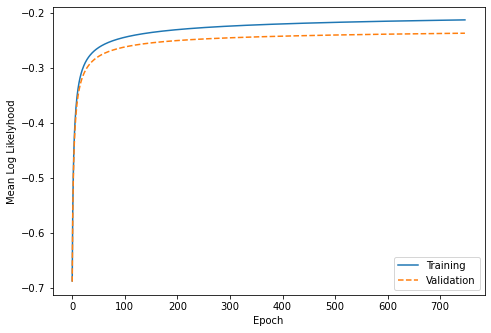

In [15]:
%matplotlib inline
fig1 = plt.figure().add_axes([0, 0, 1, 1])
fig1.plot([i for i in range(length)], J_train_list[:length], label = 'Training')#Plotting valid values only
fig1.set_xlabel('Epoch')
fig1.plot([i for i in range(length)], J_test_list[:length], label = 'Validation', linestyle = 'dashed')#Plotting valid values only
fig1.set_ylabel('Mean Log Likelyhood')
fig1.legend()

The plot can overlap sometimes, rerun(starting from the top) proves to be useful.

In [16]:
def calc_precision(t, l):
    Tpositive = 0
    Fpositive = 0
    Fnegative = 0
    for i in range(l):
        if y_test[i] == 1 and y_hat_test[i] >= t:
            Tpositive += 1
        elif y_test[i] == 0 and y_hat_test[i] >= t:
            Fpositive += 1
        elif y_test[i] == 1 and y_hat_test[i] < t:
            Fnegative += 1
    if Fpositive + Fpositive == 0:
        precision = 1
    else:
        precision = Tpositive / (Tpositive + Fpositive)
    recall = Tpositive / (Tpositive + Fnegative)
    return precision, recall

In [17]:
l = y_test.shape[0]
precision, recall = calc_precision(0.5, l)
F_measure = 2 * precision * recall / (precision + recall)

precision_list = []
recall_list = []
thresholds = np.linspace(0.0, 1.0, num = 11, endpoint = True)

for i in thresholds:
    precision_tmp, recall_tmp = calc_precision(i, l)
    precision_list.append(precision_tmp)
    recall_list.append(recall_tmp)
#print(precision_list,'\n', recall_list)
print(f'F-score : {F_measure:.4} or {F_measure * 100:.4}%')
print(f'Precision : {precision:.4} or {precision * 100:.4}%')
print(f'Recall : {recall:.4} or {recall * 100:.4}%')

F-score : 0.8968 or 89.68%
Precision : 0.9141 or 91.41%
Recall : 0.8801 or 88.01%


In [18]:
#Calculating accuracy
x = 0
for i in range(test_data.shape[0]):
    if y_test[i] == 1 and y_hat_test[i] >= 0.5:
        x += 1
    elif y_test[i] == 0 and y_hat_test[i] < 0.5:
        x += 1
        
z = x / test_data.shape[0]
print(f'Accuracy is {z * 100:.4}%')
if z * 100 >= 90:
    print('Good enough!!')
else:
    print('Not looking good')

Accuracy is 91.85%
Good enough!!


Text(0, 0.5, 'Precision')

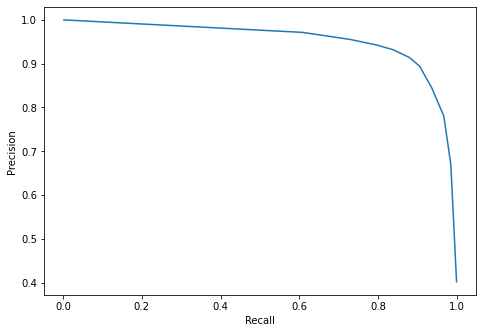

In [19]:
#Plotting
%matplotlib inline
fig2 = plt.figure().add_axes([0, 0, 1, 1])
fig2.plot(recall_list, precision_list)
fig2.set_xlabel('Recall')
fig2.set_ylabel('Precision')